# 1. Integración de LLMs en LangChain

En esta sección conocerás sobre los diferentes tipos de modelos que proporciona LangChain, sus ventajas y cómo utilizarlos para crear aplicaciones de IA potentes usando LLM.

**¿Qué es un modelo?**

Un modelo en LangChain es un modelo de aprendizaje automático pre-entrenado que se puede utilizar para realizar una tarea específica como generar texto, traducir idiomas o responder preguntas. Con LangChain puedes usar una variedad de modelos y utilizarlos para crear aplicaciones de IA sin tener que entrenar tus propios modelos desde cero.

**Ventajas de usar modelos de LangChain**

Hay varias ventajas de usar modelos de LangChain:

* **Consistencia:** Los modelos de LangChain proporcionan una interfaz consistente, independientemente de si está utilizando OpenAI o Hugging Face. Esto hace que sea más fácil aprender y usar los modelos de LangChain, y cambiar entre diferentes modelos si es necesario.
* **Eficiencia:** Los modelos de LangChain están pre-entrenados y alojados en la nube, lo que los hace mucho más rápidos de usar que entrenar sus propios modelos.
* **Flexibilidad:** Los modelos de LangChain se pueden utilizar para una variedad de tareas, como la comprensión del lenguaje natural, la traducción automática y el análisis de sentimientos.

**Ejemplos prácticos de uso de modelos de LangChain**

* **Generación de texto:** Utiliza un LLM para generar texto, como poemas, código, guiones, piezas musicales, correo electrónico, cartas, etc.
* **Traducción de idiomas:** Trauce un texto de un idioma a otro con modelos de lenguaje.
* **Escritura de diferentes tipos de contenido creativo:** Usa un modelo de lenguaje para escribir diferentes tipos de contenido creativo, como poemas, código, guiones, piezas musicales, correo electrónico, cartas, etc.
* **Respuesta a sus preguntas de forma informativa:** Utiliza un modelo de preguntas y respuestas para responder con información del modelo o que pueda consultar en otras fuentes, incluso si son abiertas, desafiantes o extrañas.


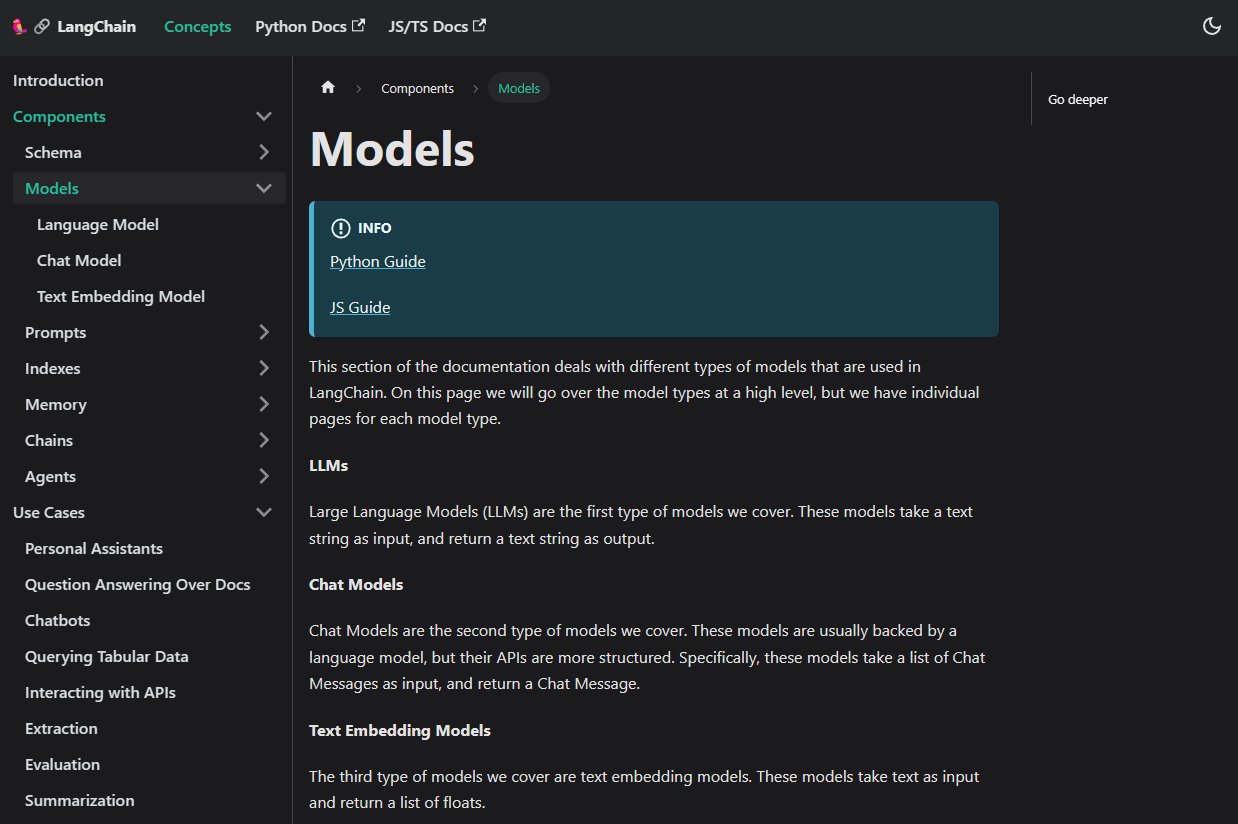

LangChain tiene integraciones con varios modelos o plataformas de modelos, como el Hugging Face Hub. Con el tiempo, habrá disponibles más integraciones y modelos.

LangChain Models Docs: https://docs.langchain.com/docs/components/models/

## 1.1 Uso de modelos Open Source de Hugging Face

In [ ]:
%%capture
!pip install langchain

Los modelos de Hugging Face requieren instalación de `einops`. Para utilizar `low_cpu_mem_usage=True` o `device_map` es necesario contar con `Accelerate` instalado: `pip install accelerate`.

In [ ]:
%%capture
!pip install -q transformers einops accelerate

Se debe tener en cuenta que entre más grande el `max_length`, es decir la cantidad de texto que podemos incluir en una consulta a nuestro modelo, más recursos computacionales se requieren. Vamos a usar los pipelines de Hugging Face: https://huggingface.co/docs/transformers/v4.30.0/main_classes/pipelines

In [ ]:
from transformers import AutoTokenizer, pipeline
import torch

# model = "tiiuae/falcon-40b-instruct"
# model = "stabilityai/stablelm-tuned-alpha-3b"
model = "tiiuae/falcon-7b-instruct"

tokenizer = AutoTokenizer.from_pretrained(model)

pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto"
)

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- configuration_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- modelling_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
The model 'RWForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusFor

Podemos enviar preguntas directamente al pipeline de Hugging Face para generar texto con nuestro modelo. Sin embargo, LangChain nos facilita la vida.

In [ ]:
type(pipeline)

transformers.pipelines.text_generation.TextGenerationPipeline

In [ ]:
from langchain import HuggingFacePipeline

llm_falcon = HuggingFacePipeline(
    pipeline = pipeline,
    model_kwargs = {
        'temperature': 0,
        'max_length': 200,
        'do_sample': True,
        'top_k': 10,
        'num_return_sequences':1,
        'eos_token_id': tokenizer.eos_token_id
    }
)



In [ ]:
llm_falcon

HuggingFacePipeline(cache=None, verbose=False, callbacks=None, callback_manager=None, tags=None, pipeline=<transformers.pipelines.text_generation.TextGenerationPipeline object at 0x7f85f83d6350>, model_id='gpt2', model_kwargs={'temperature': 0, 'max_length': 200, 'do_sample': True, 'top_k': 10, 'num_return_sequences': 1, 'eos_token_id': 11}, pipeline_kwargs=None)

In [ ]:
llm_falcon("What is AI?")

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1259: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'\nAI stands for Artificial Intelligence. It is a branch of computer science that focuses'

Los modelos de código abierto de Hugging Face son increíblemente poderosos. Sin embargo, al utilizarlos de esta manera, los descargamos y ejecutamos en nuestra propia máquina. Ahí es donde existen algunas complicaciones, ya que esto puede ser lento a menos que se cuente con el hardware adecuado.

Ahora piensa en modelos que provienen de API y servicios de OpenAI, Cohere y otros proveedores de modelos remotos (que normalmente no son de código abierto). La magia de estos modelos es que funcionan en sus servidores, no en nuestra máquina.

Es como si estuvieras invitado a una fiesta. Podrías hacer la fiesta en tu casa (como usar los modelos de Hugging Face en tu máquina), pero tendrías que hacer la limpieza antes y después, y preocuparte por la música, la comida, etc. En cambio, si la fiesta se celebra en un restaurante o salón dedicado a fiestas (como usar modelos de OpenAI o Cohere en sus servidores), solo tienes que llegar y disfrutar.

Por esto, vamos a seguir utilizando los modelos de la [API de OpenAI](https://platzi.com/cursos/openai). Todo lo que vamos a hacer a partir de ahora también se puede aplicar a los modelos descargados de Hugging Face.

## 1.2 Uso de modelos de OpenAI API

La clase `langchain.llms.OpenAI` nos permite inicializar un modelo de proveedor OpenAI.

In [ ]:
%%capture
!pip install openai langchain

Es necesario configurar la API Key de tu cuenta de OpenAI.

In [ ]:
from getpass import getpass
import os

OPENAI_API_KEY = getpass('Enter the secret value: ')
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

Enter the secret value: ··········


Para usar al máximo los LLM con LangChain, tenemos que ajustar unas cuantas configuraciones básicas:

1. `model_name` - ¿Qué modelo vamos a usar?
    Por ejemplo, "text-davinci-003" (que es el valor por defecto) o "text-ada-001". Estos nombres cambian según quién haya creado el modelo, así que necesitas revisar la documentación de la API del proveedor que estás utilizando para encontrar el nombre específico de tu modelo.

2. `n` - La cantidad de respuestas distintas que vamos a generar para la pregunta dada (el número estándar es 1)

3. `streaming` - ¿Queremos que los resultados se transmitan poco a poco? (por defecto es "Falso").
    Esto es como decidir si preferimos escuchar una canción entera de una vez, o escucharla nota por nota. Esto es especialmente útil cuando estás armando una experiencia de chatbot y quieres que el texto aparezca línea por línea, en lugar de un solo bloque de respuesta.

4. `temperature` - Aquí ajustamos la "temperatura de muestreo" en un rango de 0 a 1.
    Imagina que la temperatura es como ajustar el nivel de improvisación de un solo de guitarra. Si la temperatura es 0, el LLM solo es "preciso" y siempre tocará las notas más probables. Siempre va a sonar igual para la misma canción. Pero si la temperatura es 1, el solo será "creativo" y va a tocar notas diferentes cada vez que lo escuches, a veces incluso notas que te sorprenden. El valor estándar es 0.7, lo que se considera lo suficientemente creativo pero no completamente aleatorio, como un solo de guitarra que sale un poco de los rieles, pero no tanto como para descarrilar la canción.


In [ ]:
from langchain.llms import OpenAI

llm_gpt3_5 = OpenAI(
    model_name="gpt-3.5-turbo",
    n=1,
    temperature=0.3
)


/usr/local/lib/python3.10/dist-packages/langchain/llms/openai.py:189: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/llms/openai.py:769: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(


In [ ]:
llm_gpt3_5

OpenAIChat(cache=None, verbose=False, callbacks=None, callback_manager=None, tags=None, client=<class 'openai.api_resources.chat_completion.ChatCompletion'>, model_name='gpt-3.5-turbo', model_kwargs={'n': 1, 'temperature': 0.3}, openai_api_key=None, openai_api_base=None, openai_proxy=None, max_retries=6, prefix_messages=[], streaming=False, allowed_special=set(), disallowed_special='all')

Una vez que el modelo LLM está configurado, podemos interactuar con él de la misma manera que lo haríamos con ChatGPT.

In [ ]:
llm_gpt3_5("Cómo puedo lograr una clase más interactiva para estudiantes virtuales?")

'Aquí hay algunas sugerencias para lograr una clase más interactiva para estudiantes virtuales:\n\n1. Utilice herramientas de videoconferencia: Las herramientas de videoconferencia, como Zoom o Google Meet, permiten a los estudiantes interactuar en tiempo real con el profesor y otros estudiantes. Puede utilizar estas herramientas para realizar discusiones en grupo, presentaciones y actividades en tiempo real.\n\n2. Utilice herramientas de colaboración en línea: Las herramientas de colaboración en línea, como Google Docs o Padlet, permiten a los estudiantes trabajar juntos en proyectos y actividades en tiempo real. Puede utilizar estas herramientas para realizar actividades en grupo y fomentar la colaboración entre los estudiantes.\n\n3. Utilice juegos educativos en línea: Los juegos educativos en línea pueden ser una forma divertida y efectiva de involucrar a los estudiantes en el aprendizaje. Puede utilizar juegos educativos en línea para reforzar conceptos y habilidades, y para motiv

Además, la función `generate` nos permite pasar una lista de entradas de prompts, lo cual produce una salida más detallada que incluye información como el uso de tokens. Esta información de uso de tokens puede ser útil para realizar un seguimiento de los tokens y estimar los costos.

In [ ]:
from langchain.llms import OpenAI

llm_davinci = OpenAI(
    model_name="text-davinci-003",
    n=2,
    temperature=0.3
    )

In [ ]:
generacion = llm_davinci.generate(
    ["Dime un consejo de vida para alguien de 30 años", "Recomiendame libros similares a Hyperion Cantos"]
    )

In [ ]:
generacion.generations

[[Generation(text='\n\nAprende a disfrutar de la vida y aprovecha cada momento para hacer algo que te haga feliz. No te preocupes por el pasado ni por el futuro, vive el presente. Aprende a ser resiliente y no te rindas ante los desafíos. Aprende a ser paciente y acepta que las cosas no siempre salen como esperas.', generation_info={'finish_reason': 'stop', 'logprobs': None}),
  Generation(text='\n\nAprovecha cada momento para hacer algo que te haga feliz. No te preocupes por el pasado ni por el futuro, sino vive el presente al máximo.', generation_info={'finish_reason': 'stop', 'logprobs': None})],
 [Generation(text='\n\n1. The Fall of Hyperion de Dan Simmons\n2. The Rise of Endymion de Dan Simmons\n3. The Endymion Omnibus de Dan Simmons\n4. The Illium de Dan Simmons\n5. The Olympos de Dan Simmons\n6. The Rise of Endymion de Dan Simmons\n7. The Rise of Endymion de Dan Simmons\n8. The Rise of Endymion de Dan Simmons\n9. The Rise of Endymion de Dan Simmons\n10. The Rise of Endymion de D

In [ ]:
generacion.llm_output

{'token_usage': {'prompt_tokens': 32,
  'completion_tokens': 383,
  'total_tokens': 415},
 'model_name': 'text-davinci-003'}

Otra función útil proporcionada por la clase LLM es `get_num_tokens`, que estima el número de tokens y fragmentos de texto contenidos en una entrada. Esta información es valiosa cuando se necesita limitar el número total de tokens o cumplir con un presupuesto específico.

In [ ]:
%%capture
!pip install tiktoken

In [ ]:
llm_gpt3_5.get_num_tokens("mis jefes se van a preocupar si gasto mucho en openai")

16

## 1.3 Prompt templates

Un 'prompt' o 'indicación' es como una receta que le proporcionamos a nuestro modelo de inteligencia artificial (IA). Esta receta contiene los ingredientes y las instrucciones que la IA necesita para cocinar la respuesta que estamos buscando.

1. **Instrucciones:** Esta es la parte donde le decimos a nuestro modelo de IA exactamente qué queremos que haga. Piensa en esto como cuando lees una receta de cocina. Por ejemplo, "corta las verduras", "sofríe los ingredientes", etc.

2. **Información externa o contexto:** Este es el ingrediente que añadimos a nuestra receta. Podría ser información que obtenemos de una base de datos, un cálculo que hemos hecho, etc. Esto le da a nuestro modelo un poco de sabor adicional y contexto sobre lo que estamos buscando.

3. **Entrada del usuario o consulta:** Este es el ingrediente principal de nuestra receta. Es el dato que el usuario introduce y en torno al cual queremos que nuestro modelo cocine la respuesta.

4. **Indicador de salida:** Piensa en esto como el momento en el que sabes que tu receta está lista. Para un modelo que genera código Python, podría ser la palabra 'import', que suele ser el comienzo de muchos scripts de Python. Para un chatbot, podría ser la frase 'Chatbot:', indicando que es hora de que el chatbot hable.

Por lo general, estos componentes se colocan en el orden en que los hemos descrito, igual que seguirías los pasos de una receta de cocina. Empezamos con las instrucciones, añadimos el contexto, luego la entrada del usuario, y finalmente, buscamos nuestro indicador de salida para saber que hemos terminado.

Agregamos estas cuatro recetas en el siguiente prompt que habla con estilo argentino.

Puedes aprender más de prompt engineering en https://platzi.com/cursos/chatgpt/


In [ ]:
prompt_argentino = """Respondé la pregunta basándote en el contexto de abajo. Si la
pregunta no puede ser respondida usando la información proporcionada,
respondé con "Ni idea, che".

Contexto: Los Modelos de Lenguaje de Gran Escala (MLGEs) son lo último en modelos usados en el Procesamiento del Lenguaje Natural (NLP).
Su desempeño superior a los modelos más chicos los hizo increíblemente
útiles para los desarrolladores que arman aplicaciones con NLP. Estos modelos
se pueden acceder vía la librería `transformers` de Hugging Face, vía OpenAI
usando la librería `openai`, y vía Cohere usando la librería `cohere`.

Pregunta: ¿Qué librerías están cerca de Buenos Aires?

Respuesta (escribe como argentina informal): """

print(llm_gpt3_5(prompt_argentino))

Ni idea, che. El contexto no tiene nada que ver con librerías cercanas a Buenos Aires.


Normalmente, no tenemos ni idea de lo que los usuarios van a preguntar de antemano. Así que, en lugar de escribir la pregunta directamente en el código, creamos un `PromptTemplate` (una plantilla de indicación) que tiene una casilla reservada para la pregunta. Es como tener una receta de cocina, pero en lugar de especificar 'pollo', tenemos un espacio en blanco que dice 'ingrediente principal'. De esta manera, los usuarios pueden poner lo que quieran en ese espacio, y el sistema adaptará su respuesta de acuerdo con lo que ellos introduzcan.


In [ ]:
from langchain import PromptTemplate

plantilla_colombiana = """Responde a la pregunta con base en el siguiente contexto, parce. Si la
pregunta no puede ser respondida con la información proporcionada, responde
con "No tengo ni idea, ome".

Contexto: {contexto}
Pregunta: {pregunta}

Respuesta (escribe como colombiano informal): """

prompt_plantilla_colombiana = PromptTemplate(
    input_variables=["pregunta"],
    template=plantilla_colombiana
)


Crearemos una cadena, más adelante conocerás exactamente qué significa esto. Por ahora, lo relevante es que nos permite unir nuestro prompt con un modelo.

In [ ]:
from langchain import LLMChain

llm_gpt3_5_chain = LLMChain(
    prompt=prompt_plantilla_colombiana,
    llm=llm_gpt3_5
)

pregunta = "Qué son los LLMs?"

llm_gpt3_5_chain.run(pregunta)

'Los LLMs son unos modelos de lenguaje grandotes que se usan en PNL y son más bacanes que los modelos chiquiticos. Los devs los usan mucho para hacer aplicaciones de PNL y se pueden acceder por medio de las bibliotecas `transformers`, `openai` y `cohere`.'

In [ ]:
pregunta = "What is Vallenato?"

llm_gpt3_5_chain.run(pregunta)

'No tengo ni idea, parcero.'

## 1.4 Chains (Cadenas)

Una cadena está compuesta por diferentes elementos, denominados eslabones, que pueden ser primitivas o incluso otras cadenas. Las primitivas, a su vez, pueden ser prompts, LLMs, utilidades, u otras cadenas.

Así que, en términos sencillos, una cadena no es más que una secuencia de operaciones que se llevan a cabo utilizando una mezcla específica de primitivas para procesar una entrada dada. Si lo visualizas de manera intuitiva, podrías pensar en una cadena como una especie de 'paso', que realiza un conjunto específico de operaciones en una entrada y produce un resultado. Estas operaciones pueden variar desde un prompt que pasa a través de un LLM, hasta la ejecución de una función de Python sobre un texto.

Las cadenas se agrupan en tres categorías principales:
- Cadenas de utilidad (Utility chain).
- Cadenas fundacionales (Foundational chains).
- Cadenas de combinación de documentos.

En este segmento, nos concentraremos en las primeras dos categorías, ya que la tercera es muy específica.

* Cadenas de utilidad (Utility chains): Este tipo de cadenas generalmente se emplean para extraer una respuesta específica de un LLM con un objetivo muy definido, y están listas para ser usadas sin modificaciones.

* Cadenas fundacionales (Foundational chains): Estas cadenas se usan como base para construir otras cadenas, sin embargo, a diferencia de las Cadenas de utilidad, las Cadenas fundacionales no pueden ser usadas tal cual sin formar parte de una cadena más compleja.


### 1.4.1 Utility Chains

Importamos un texto para que trabajemos con él. En el módulo de índices aprenderemos más sobre lo que está ocurriendo.

In [ ]:
%%capture
!pip install unstructured pypdf chromadb

In [ ]:
import requests
from langchain.document_loaders import PyPDFLoader
from langchain.vectorstores import Chroma
from langchain.embeddings.openai import OpenAIEmbeddings

url = 'https://www.cs.virginia.edu/~evans/greatworks/diffie.pdf'
response = requests.get(url)

with open('public_key_cryptography.pdf', 'wb') as f:
    f.write(response.content)

loader = PyPDFLoader("./public_key_cryptography.pdf")
data = loader.load()

embeddings = OpenAIEmbeddings()
vectorstore = Chroma.from_documents(data, embeddings)

Imagina que tienes un libro de 18 páginas delante de ti y alguien te pide un resumen. ¿Cómo lo haces? Seguramente no intentarías leer las 18 páginas de una sola vez y luego producir un resumen, ¿verdad? En su lugar, es probable que leyeras una página a la vez, escribieras un pequeño resumen, y luego lo harías para las siguientes páginas. Después de resumir todas las páginas de manera individual, podrías combinar esos resúmenes en uno más general.

¡Exactamente eso es lo que hace **`load_summarize_chain`**!

Esta cadena divide el texto en secciones más manejables (por ejemplo, por página) y luego llama al modelo de lenguaje para generar un resumen de cada sección. Una vez que todos los resúmenes individuales se han generado, los combina en un solo resumen. De esta manera, incluso un texto muy largo se puede resumir de manera efectiva.

Por tanto, si estás trabajando con un documento de investigación de 18 páginas, puedes dividirlo en 18 documentos separados, uno por página, y luego usar **`load_summarize_chain`** para generar un resumen general. ¿No es fantástico?

In [ ]:
len(data)

18

*Nota: hablaremos en un texto sobre los chain types.

In [ ]:
from langchain.chains.summarize import load_summarize_chain

cadena_que_resume_documentos = load_summarize_chain(
    llm_davinci,
    chain_type="map_reduce"
)

cadena_que_resume_documentos.run(data)

" Public-key cryptography is a method of encryption that allows for secure communication between two parties, even if one of the keys is compromised. It was discovered in 1975 and has revolutionized communication security by allowing secure communication networks with hundreds of thousands of subscribers. It solves two problems: key distribution and digital signatures. Key distribution allows two people to communicate a secret key without ever having met and digital signatures allow a recipient of a digital message to demonstrate to other people that it came from a particular person. In the 1980s, several companies dedicated to developing public-key technology were formed and products such as RSA Data Security's Mailsafe and Cylink's CIDECHS were produced. Whitfield Diffie is a mathematician and cryptographer who worked with Martin Hellman at Stanford University on cryptography and has since worked on key management protocols for telephones."

Si usamos una `chain_type` stuff entonces podemos incluir nuestro propio prompt/plantilla. Sin embargo, le cabe solo el máximo de tokens permitidos por el modelo y no documentos largos.

In [ ]:
plantilla = """Escribe un resumen bien chido del siguiente rollo:

{text}

RESUMEN CORTO CON SLANG MEXICANO:"""

prompt = PromptTemplate(
    template=plantilla,
    input_variables=["text"]
)

In [ ]:
cadena_que_resume_con_slang = load_summarize_chain(
    llm=llm_davinci,
    chain_type="stuff",
    prompt=prompt,
    verbose=True
)

cadena_que_resume_con_slang.run(data[:2])



> Entering new  chain...


> Entering new  chain...
Prompt after formatting:
Escribe un resumen bien chido del siguiente rollo:

The First Ten Years of Public-Key 
Cryptography 
WH lTFl ELD DI FFlE 
Invited Paper 
Public-key cryptosystems separate the capacities for encryption 
and decryption so that 7) many people can encrypt messages in 
such a way that only one person can read them, or 2) one person 
can encrypt messages in such a way that many people can read 
them. This separation allows important improvements in the man- 
agement of cryptographic keys and makes it possible to ‘sign’ a 
purely digital message. 
Public key cryptography was discovered in the Spring of 1975 
and has followed a surprising course. Although diverse systems 
were proposed early on, the ones that appear both practical and 
secure today are all very closely related and the search for new and 
different ones has met with little success. Despite this reliance on 
a limited mathematical foundation public-ke

'\n\nPublic-key cryptography fue descubierta en 1975 y ha cambiado la forma en que la gente se comunica de forma segura. Esta criptografía separa la capacidad de encriptación y desencriptación para que muchas personas puedan encriptar mensajes de tal forma que solo una persona pueda leerlos. Esto también permite mejorar la gestión de llaves criptográficas y hacer posible firmar un mensaje digital. Esta criptografía de llave pública ha revolucionado la seguridad de la comunicación permitiendo redes seguras con cientos de miles de suscriptores. ¡La criptografía de llave pública es la onda!'

También podemos resolver preguntas con `RetrievalQA`

In [ ]:
from langchain.chains import RetrievalQA

cadena_que_resuelve_preguntas = RetrievalQA.from_chain_type(
    llm=llm_gpt3_5,
    chain_type="stuff",
    retriever=vectorstore.as_retriever(search_kwargs={"k": 2})
)

In [ ]:
cadena_que_resuelve_preguntas.run("¿Cuál es la relevancia de la criptografía de llave pública?")

'Public-key cryptography has become a mainstay of cryptographic technology and is soon to be implemented in hundreds of thousands of secure telephones. Efforts are also underway to apply the same mechanisms to data communications on a similar scale. The demand for public key is exemplified by a recent conference on smart cards in Vienna, Austria, where one question was heard over and over again: When will we have an RSA card? Its technological base may be narrow, but the operations on which public-key cryptography currently depends have been the subject of intense mathematical scrutiny for centuries, and our ability to carry out large arithmetic computations has grown steadily. The success of public-key cryptography will delay the introduction of new systems until the equipment now going into the field becomes outmoded for other reasons.'

### 1.4.2 Foundational Chains

Primero, vamos a construir una función personalizada para limpiar nuestros textos de URLs y emojis. Luego, utilizaremos esta función para crear una cadena en la que introduciremos nuestro texto y esperamos obtener un texto limpio como salida.

Debemos tener en cuenta que la función que hemos creado recibe como entrada un diccionario. En este diccionario, vamos a indicar los elementos que serán procesados por la cadena que estamos creando. El resultado que obtendremos de la cadena será el texto limpio.

Esto es el principio fundamental de las cadenas fundacionales, nos proporcionan un marco para llevar a cabo una serie de transformaciones de manera ordenada y estructurada.

In [ ]:
import re

def limpiar_texto(entradas: dict) -> dict:
    texto = entradas["texto"]

    # Eliminamos los emojis utilizando un amplio rango unicode
    # Ten en cuenta que esto podría potencialmente eliminar algunos caracteres válidos que no son en inglés
    patron_emoji = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticonos
        "\U0001F300-\U0001F5FF"  # símbolos y pictogramas
        "\U0001F680-\U0001F6FF"  # símbolos de transporte y mapas
        "\U0001F1E0-\U0001F1FF"  # banderas (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE,
    )
    texto = patron_emoji.sub(r'', texto)

    # Removemos las URLs
    patron_url = re.compile(r'https?://\S+|www\.\S+')
    texto = patron_url.sub(r'', texto)

    return {"texto_limpio": texto}

In [ ]:
from langchain.chains import TransformChain

cadena_que_limpia = TransformChain(
    input_variables=["texto"],
    output_variables=["texto_limpio"],
    transform=limpiar_texto
)

In [ ]:
cadena_que_limpia.run('Chequen está página https://twitter.com/home 🙈')

'Chequen está página  '

Vamos a unir nuestra cadena que limpia texto con una cadena que use GPT-3.5.

In [ ]:
plantilla = """Parafrasea este texto:

{texto_limpio}

En el estilo de una persona informal de {estilo}.

Parafraseado: """

prompt = PromptTemplate(
    input_variables=["texto_limpio", "estilo"],
    template=plantilla
)

In [ ]:
from langchain.chains import LLMChain

cadena_que_cambia_estilo = LLMChain(
    llm=llm_gpt3_5,
    prompt=prompt,
    output_key='texto_final'
)

In [ ]:
from torch.utils.data.dataset import ChainDataset
from langchain.chains import SequentialChain

cadena_secuencial = SequentialChain(
    chains=[cadena_que_limpia, cadena_que_cambia_estilo],
    input_variables=["texto", "estilo"],
    output_variables=["texto_final"]
)



In [ ]:
texto_entrada = """
¡Monterrey es una ciudad impresionante! 🏙️
Es conocida por su impresionante paisaje de montañas ⛰️ y su vibrante cultura norteña.
¡No olvides visitar el famoso Museo de Arte Contemporáneo (MARCO)!
🖼️ Si eres fanático del fútbol, no puedes perderte un partido de los Rayados o de los Tigres. ⚽
Aquí te dejo algunos enlaces para que puedas conocer más sobre esta maravillosa ciudad:
https://visitamonterrey.com, https://museomarco.org, https://rayados.com, https://www.tigres.com.mx.
¡Monterrey te espera con los brazos abiertos! 😃🇲🇽
"""


In [ ]:
cadena_secuencial({'texto': texto_entrada, 'estilo': 'Perú'})

{'texto': '\n¡Monterrey es una ciudad impresionante! 🏙️\nEs conocida por su impresionante paisaje de montañas ⛰️ y su vibrante cultura norteña.\n¡No olvides visitar el famoso Museo de Arte Contemporáneo (MARCO)!\n🖼️ Si eres fanático del fútbol, no puedes perderte un partido de los Rayados o de los Tigres. ⚽\nAquí te dejo algunos enlaces para que puedas conocer más sobre esta maravillosa ciudad:\nhttps://visitamonterrey.com, https://museomarco.org, https://rayados.com, https://www.tigres.com.mx.\n¡Monterrey te espera con los brazos abiertos! 😃🇲🇽\n',
 'estilo': 'Perú',
 'texto_final': '¡Oye, Monterrey es una ciudad súper chévere! Tiene unas montañas impresionantes y una cultura norteña muy vibrante. Si vas, no te pierdas el Museo de Arte Contemporáneo (MARCO) que es súper famoso. Si te gusta el fútbol, tienes que ir a ver un partido de los Rayados o de los Tigres. Aquí te dejo unos links para que puedas saber más de esta ciudad bacán. ¡Monterrey te espera con los brazos abiertos!'}